In [64]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import precision_score, recall_score, f1_score, accuracy_score, confusion_matrix
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
import pandas as pd

In [3]:
match_data = pd.read_csv('C:\\Users\\Facu\\PycharmProjects\\Proyecto_Final_IA\\proyecto_final\\data\\matchData.csv')
#Serializamos el data frame
match_data['teams'] = match_data['teams'].apply(eval)  # Convierte la cadena JSON a una lista de diccionarios


In [4]:
# agrega las columnas: firstBloodTeam1', 'firstTowerTeam1,'firstBaronTeam1','firstDragonTeam1', 'firstRiftHeraldTeam1', 'ban1Team1', 'ban2Team1', 'ban3Team1', 'ban4Team1', 'ban5Team1', champ1Team1, champ2Team1, champ3Team1, champ4Team1, champ5Team1, 'firstBloodTeam2', 'firstTowerTeam2', 'firstBaronTeam2', 'firstDragonTeam2', 'firstRiftHeraldTeam2', 'ban1Team2', 'ban2Team2', 'ban3Team2', 'ban4Team2', 'ban5Team2', champ1Team2, champ2Team2, champ3Team2, champ4Team2, champ5Team2.
match_data['firstBloodTeam1'] = [None for _ in range(len(match_data))]
match_data['firstTowerTeam1'] = [None for _ in range(len(match_data))]
match_data['firstBaronTeam1'] = [None for _ in range(len(match_data))]
match_data['firstDragonTeam1'] = [None for _ in range(len(match_data))]
match_data['firstRiftHeraldTeam1'] = [None for _ in range(len(match_data))]
match_data['ban1Team1'] = [None for _ in range(len(match_data))]
match_data['ban2Team1'] = [None for _ in range(len(match_data))]
match_data['ban3Team1'] = [None for _ in range(len(match_data))]
match_data['ban4Team1'] = [None for _ in range(len(match_data))]
match_data['ban5Team1'] = [None for _ in range(len(match_data))]
match_data['champ1Team1'] = [None for _ in range(len(match_data))]
match_data['champ2Team1'] = [None for _ in range(len(match_data))]
match_data['champ3Team1'] = [None for _ in range(len(match_data))]
match_data['champ4Team1'] = [None for _ in range(len(match_data))]
match_data['champ5Team1'] = [None for _ in range(len(match_data))]
match_data['firstBloodTeam2'] = [None for _ in range(len(match_data))]
match_data['firstTowerTeam2'] = [None for _ in range(len(match_data))]
match_data['firstBaronTeam2'] = [None for _ in range(len(match_data))]
match_data['firstDragonTeam2'] = [None for _ in range(len(match_data))]
match_data['firstRiftHeraldTeam2'] = [None for _ in range(len(match_data))]
match_data['ban1Team2'] = [None for _ in range(len(match_data))]
match_data['ban2Team2'] = [None for _ in range(len(match_data))]
match_data['ban3Team2'] = [None for _ in range(len(match_data))]
match_data['ban4Team2'] = [None for _ in range(len(match_data))]
match_data['ban5Team2'] = [None for _ in range(len(match_data))]
match_data['champ1Team2'] = [None for _ in range(len(match_data))]
match_data['champ2Team2'] = [None for _ in range(len(match_data))]
match_data['champ3Team2'] = [None for _ in range(len(match_data))]
match_data['champ4Team2'] = [None for _ in range(len(match_data))]
match_data['champ5Team2'] = [None for _ in range(len(match_data))]

In [5]:
# Busca los valores de las columnas anteriores en la columna 'teams' y los agrega en las columnas correspondientes
def get_team_data(teams, n):
    team1 = None  
    team2 = None  
    for team in teams:
        if team['teamId'] == 100:
            team1 = team
        else:
            team2 = team
    match_data.at[match_data.index[n], 'firstBloodTeam1'] = team1.get('firstBlood', None)
    match_data.at[match_data.index[n], 'firstTowerTeam1'] = team1.get('firstTower', None)
    match_data.at[match_data.index[n], 'firstBaronTeam1'] = team1.get('firstBaron', None)
    match_data.at[match_data.index[n], 'firstDragonTeam1'] = team1.get('firstDragon', None)
    match_data.at[match_data.index[n], 'firstRiftHeraldTeam1'] = team1.get('firstRiftHerald', None)
    
    if team1['bans']:
        match_data.at[match_data.index[n], 'ban1Team1'] = team1['bans'][0].get('championId', None)
        match_data.at[match_data.index[n], 'ban2Team1'] = team1['bans'][1].get('championId', None)
        match_data.at[match_data.index[n], 'ban3Team1'] = team1['bans'][2].get('championId', None)
        match_data.at[match_data.index[n], 'ban4Team1'] = team1['bans'][3].get('championId', None)
        match_data.at[match_data.index[n], 'ban5Team1'] = team1['bans'][4].get('championId', None)

    match_data.at[match_data.index[n], 'champ1Team1'] = team1.get('championId', None)
    match_data.at[match_data.index[n], 'champ2Team1'] = team1.get('championId', None)
    match_data.at[match_data.index[n], 'champ3Team1'] = team1.get('championId', None)
    match_data.at[match_data.index[n], 'champ4Team1'] = team1.get('championId', None)
    match_data.at[match_data.index[n], 'champ5Team1'] = team1.get('championId', None)
    match_data.at[match_data.index[n], 'firstBloodTeam2'] = team2.get('firstBlood', None)
    match_data.at[match_data.index[n], 'firstTowerTeam2'] = team2.get('firstTower', None)
    match_data.at[match_data.index[n], 'firstBaronTeam2'] = team2.get('firstBaron', None)
    match_data.at[match_data.index[n], 'firstDragonTeam2'] = team2.get('firstDragon', None)
    match_data.at[match_data.index[n], 'firstRiftHeraldTeam2'] = team2.get('firstRiftHerald', None)
    
    if team2['bans']:
        match_data.at[match_data.index[n], 'ban1Team2'] = team2['bans'][0].get('championId', None)
        match_data.at[match_data.index[n], 'ban2Team2'] = team2['bans'][1].get('championId', None)
        match_data.at[match_data.index[n], 'ban3Team2'] = team2['bans'][2].get('championId', None)
        match_data.at[match_data.index[n], 'ban4Team2'] = team2['bans'][3].get('championId', None)
        match_data.at[match_data.index[n], 'ban5Team2'] = team2['bans'][4].get('championId', None)

    match_data.at[match_data.index[n], 'champ1Team2'] = team2.get('championId', None)
    match_data.at[match_data.index[n], 'champ2Team2'] = team2.get('championId', None)
    match_data.at[match_data.index[n], 'champ3Team2'] = team2.get('championId', None)
    match_data.at[match_data.index[n], 'champ4Team2'] = team2.get('championId', None)
    match_data.at[match_data.index[n], 'champ5Team2'] = team2.get('championId', None)
    return n+1

match_data['index'] = match_data.index
match_data.apply(lambda row: get_team_data(row['teams'], row['index']), axis=1)  # Aplica la función a cada fila del dataframe
match_data.drop('index', axis=1, inplace=True)  # Elimina la columna temporal 'index'


In [6]:
match_data['participants'] = match_data['participants'].apply(eval)

In [7]:
# rellena las columas de campeones con el ID del campeón que seleccionó cada jugador
def get_champ_data(participants, n):
    for participant in participants:
        if participant['teamId'] == 100:
            if participant['participantId'] == 1:
                match_data.at[match_data.index[n], 'champ1Team1'] = participant.get('championId', None)
            elif participant['participantId'] == 2:
                match_data.at[match_data.index[n], 'champ2Team1'] = participant.get('championId', None)
            elif participant['participantId'] == 3:
                match_data.at[match_data.index[n], 'champ3Team1'] = participant.get('championId', None)
            elif participant['participantId'] == 4:
                match_data.at[match_data.index[n], 'champ4Team1'] = participant.get('championId', None)
            elif participant['participantId'] == 5:
                match_data.at[match_data.index[n], 'champ5Team1'] = participant.get('championId', None)
        else:
            if participant['participantId'] == 6:
                match_data.at[match_data.index[n], 'champ1Team2'] = participant.get('championId', None)
            elif participant['participantId'] == 7:
                match_data.at[match_data.index[n], 'champ2Team2'] = participant.get('championId', None)
            elif participant['participantId'] == 8:
                match_data.at[match_data.index[n], 'champ3Team2'] = participant.get('championId', None)
            elif participant['participantId'] == 9:
                match_data.at[match_data.index[n], 'champ4Team2'] = participant.get('championId', None)
            elif participant['participantId'] == 10:
                match_data.at[match_data.index[n], 'champ5Team2'] = participant.get('championId', None)
    return n+1

match_data['index'] = match_data.index
match_data.apply(lambda row: get_champ_data(row['participants'], row['index']), axis=1)
match_data.drop('index', axis=1, inplace=True)  # Elimina la columna temporal 'index'


In [8]:
# Elimina las filas con valores nulos
match_data.dropna(inplace=True)

In [9]:
def get_win(team_list):
    wins = [team.get('win', None) for team in team_list]
    return wins

# Aplica la función a la columna 'teams' para obtener la columna 'win'
wins = match_data['teams'].apply(get_win)

In [10]:
# Elimina las columas 'participantsIdentities', 'participants', y 'teams'
match_data.drop('participantIdentities', axis=1, inplace=True)
match_data.drop('participants', axis=1, inplace=True)
match_data.drop('teams', axis=1, inplace=True)

In [11]:
match_data.head()

,gameDuration,gameId,firstBloodTeam1,firstTowerTeam1,firstBaronTeam1,firstDragonTeam1,firstRiftHeraldTeam1,ban1Team1,ban2Team1,ban3Team1,...,ban1Team2,ban2Team2,ban3Team2,ban4Team2,ban5Team2,champ1Team2,champ2Team2,champ3Team2,champ4Team2,champ5Team2
0,1323.0,4247263043,True,False,False,False,False,-1,80,875,...,523,429,142,62,-1,235,81,127,84,421
1,1317.0,4247155821,False,False,False,True,True,523,429,60,...,875,432,76,2,64,235,126,517,58,15
2,932.0,4243963257,False,False,False,False,False,110,142,875,...,350,4,105,875,80,12,429,7,64,82
3,2098.0,4241678498,False,False,True,True,False,523,412,429,...,81,110,523,429,60,875,41,21,154,157
4,2344.0,4241538868,True,True,True,True,True,30,429,523,...,523,106,80,110,105,62,2,517,142,350


In [12]:
match_data.drop('gameId', axis=1, inplace=True)

In [13]:
win_team1 = [win[0] for win in wins]
win_team2 = [win[1] for win in wins]

<Axes: ylabel='count'>

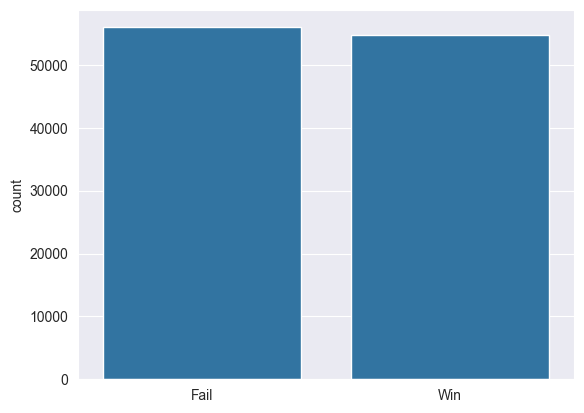

In [17]:
#Graficar la cantidad de victrorias con respecto a las derrotas de un equipo
sns.countplot(x=win_team1)

In [14]:
# Dividir los datos en conjunto de entrenamiento y conjunto de prueba
predictors = match_data
predictors_train, predictors_test, wins_team1_train, wins_team1_test, wins_team2_train, wins_team2_test = train_test_split(predictors, win_team1, win_team2, test_size=0.2, random_state=42)

In [59]:
# Inicializa el clasificador
random_forest_model = RandomForestClassifier(n_estimators=100, random_state=42, n_jobs=-1, min_impurity_decrease=0.0001)

# Entrena el modelo
random_forest_model.fit(predictors_train, wins_team1_train)

RandomForestClassifier(min_impurity_decrease=0.0001, n_jobs=-1, random_state=42)

In [60]:
wins_pred = random_forest_model.predict(predictors_test)

# Evalúa el rendimiento del modelo
accuracy = accuracy_score(wins_team1_test, wins_pred)
print(f'Accuracy: {accuracy}')

Accuracy: 0.847807433500429


Matriz de Confusión:
             Predicted Win  Predicted Lose
Actual Win            9415            1747
Actual Lose           1623            9358


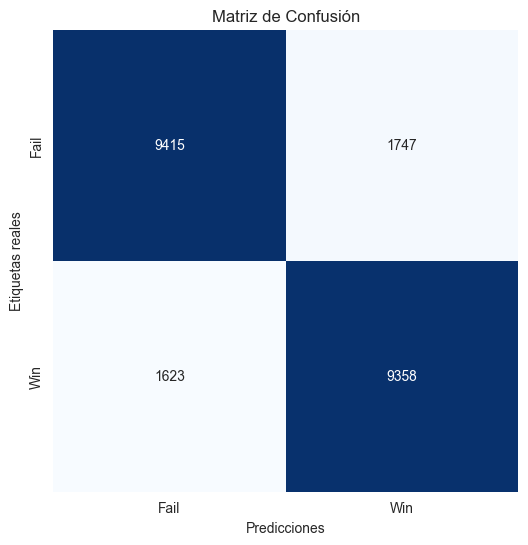

In [65]:
# Crear la matriz de confusión para team1
conf_matrix = confusion_matrix(wins_team1_test, wins_pred)

# Crear un DataFrame de pandas para visualizar mejor la matriz de confusión
conf_matrix_df = pd.DataFrame(conf_matrix, index=['Actual Win', 'Actual Lose'], columns=['Predicted Win', 'Predicted Lose'])

# Imprimir la matriz de confusión
print("Matriz de Confusión:")
print(conf_matrix_df)

plt.figure(figsize=(6, 6))
sns.heatmap(conf_matrix, annot=True, fmt="d", cmap="Blues", cbar=False,
            xticklabels=np.unique(wins_pred),
            yticklabels=np.unique(wins_team1_test))
plt.xlabel('Predicciones')
plt.ylabel('Etiquetas reales')
plt.title('Matriz de Confusión')
plt.show()

Matriz de Confusión:
             Predicted Win  Predicted Lose
Actual Win            1623            9358
Actual Lose           9415            1747


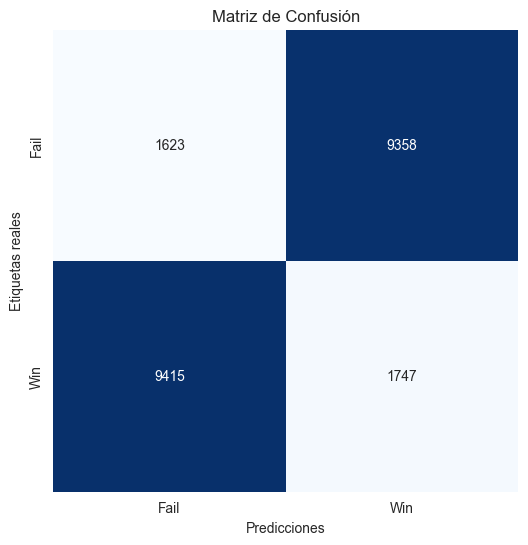

In [66]:
# Crear la matriz de confusión para team1
conf_matrix = confusion_matrix(wins_team2_test, wins_pred)

# Crear un DataFrame de pandas para visualizar mejor la matriz de confusión
conf_matrix_df = pd.DataFrame(conf_matrix, index=['Actual Win', 'Actual Lose'], columns=['Predicted Win', 'Predicted Lose'])

# Imprimir la matriz de confusión
print("Matriz de Confusión:")
print(conf_matrix_df)

plt.figure(figsize=(6, 6))
sns.heatmap(conf_matrix, annot=True, fmt="d", cmap="Blues", cbar=False,
            xticklabels=np.unique(wins_pred),
            yticklabels=np.unique(wins_team2_test))
plt.xlabel('Predicciones')
plt.ylabel('Etiquetas reales')
plt.title('Matriz de Confusión')
plt.show()

In [28]:
# Calcular la precisión para team1: 
precision = precision_score(wins_team1_test, wins_pred, average='weighted')

# Calcular la sensibilidad (recall) para team1: 
recall = recall_score(wins_team1_test, wins_pred, average='weighted')

# Calcular la puntuación F1 para team1: 
f1 = f1_score(wins_team1_test, wins_pred, average='weighted')

# Calcular la exactitud para team1: 
accuracy = accuracy_score(wins_team1_test, wins_pred)

# Imprimir las métricas
print(f'Precisión: {precision:.4f}')
print(f'Sensibilidad (Recall): {recall:.4f}')
print(f'Puntuación F1: {f1:.4f}')
print(f'Exactitud: {accuracy:.4f}')

Precisión: 0.8464
Sensibilidad (Recall): 0.8463
Puntuación F1: 0.8463
Exactitud: 0.8463


In [19]:
# Calcular la precisión para team1: 1668/(1668+9458) = 0.1499
precision = precision_score(wins_team2_test, wins_pred, average='weighted')

# Calcular la sensibilidad (recall) para team1: 1668/(1668 + 9313) = 0.1519
recall = recall_score(wins_team2_test, wins_pred, average='weighted')

# Calcular la puntuación F1 para team1: 2 * 1668/ (2 * 1668 + 9313 + 9548) = 0.1503
f1 = f1_score(wins_team2_test, wins_pred, average='weighted')

# Calcular la exactitud para team1: (1668 + 1704) / (1668 + 9313 + 9458 + 1704) = 0.1523
accuracy = accuracy_score(wins_team2_test, wins_pred)

# Imprimir las métricas
print(f'Precisión: {precision:.4f}')
print(f'Sensibilidad (Recall): {recall:.4f}')
print(f'Puntuación F1: {f1:.4f}')
print(f'Exactitud: {accuracy:.4f}')

Precisión: 0.1523
Sensibilidad (Recall): 0.1523
Puntuación F1: 0.1523
Exactitud: 0.1523


In [18]:
# Ver la importancia de cada columna
feature_importances = random_forest_model.feature_importances_
print('Importancia de las características:')
sorted(feature_importances, reverse=True)
for i, importance in enumerate(feature_importances):
     print(f'{random_forest_model.feature_names_in_[i]}: {importance}')

Importancia de las características:
gameDuration: 0.08705084312743484
firstBloodTeam1: 0.008881691639364869
firstTowerTeam1: 0.0825205584976236
firstBaronTeam1: 0.10674255111160987
firstDragonTeam1: 0.02151483608993732
firstRiftHeraldTeam1: 0.019316369964379708
ban1Team1: 0.01933797521111957
ban2Team1: 0.019375694035800597
ban3Team1: 0.019068490056733726
ban4Team1: 0.01898673855901859
ban5Team1: 0.01914907161909964
champ1Team1: 0.0215230183590603
champ2Team1: 0.02135493154022055
champ3Team1: 0.021798068884833616
champ4Team1: 0.021598227224255955
champ5Team1: 0.02133417474760227
firstBloodTeam2: 0.008285272343190007
firstTowerTeam2: 0.08561416096188963
firstBaronTeam2: 0.12881791997211628
firstDragonTeam2: 0.021212963787274875
firstRiftHeraldTeam2: 0.02294293014782672
ban1Team2: 0.019485112299862342
ban2Team2: 0.0192590645221861
ban3Team2: 0.018905297844254404
ban4Team2: 0.01904215166955008
ban5Team2: 0.019130863677188442
champ1Team2: 0.021569971815511405
champ2Team2: 0.0212791745236357